In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
path = "/mnt/home/jieyaqi/code/FMST/Shell_for_FMM/file"
sacfile = "/mnt/ufs18/nodr/home/jieyaqi/east_africa/all_debias/sacfile.txt"

In [2]:
def remove_null(a):
    while '' in a:
        a.remove('')
    return a

In [3]:
# get ccf dictionary
with open(sacfile, 'r') as f:
    ccfs = f.readlines()
ccfdic = {ccf.strip().split(' ')[3]:ccf.split(' ')[2] for ccf in ccfs}

In [4]:
# check ccf for period
perlist = [5,7,9,13,17,21,25,29,33,37,41,45]
I2 = []
I3 = []
for per in [5,7,9,13,17,21,25,29,33,37,41,45]:
    ccffile = f'{path}/out_phase.{per}.dat'
    print(ccffile)
    I2num = 0
    I3num = 0
    with open(ccffile,'r') as f:
        lines = f.readlines()
        for line in lines:
            ccf = remove_null(line.split(' '))[8]
            if ccfdic[ccf] == 'I2':
                I2num += 1
            elif 'I3' in ccfdic[ccf]:
                I3num += 1
    I2.append(I2num)
    I3.append(I3num)

/mnt/home/jieyaqi/code/FMST/Shell_for_FMM/file/out_phase.5.dat
/mnt/home/jieyaqi/code/FMST/Shell_for_FMM/file/out_phase.7.dat
/mnt/home/jieyaqi/code/FMST/Shell_for_FMM/file/out_phase.9.dat
/mnt/home/jieyaqi/code/FMST/Shell_for_FMM/file/out_phase.13.dat
/mnt/home/jieyaqi/code/FMST/Shell_for_FMM/file/out_phase.17.dat
/mnt/home/jieyaqi/code/FMST/Shell_for_FMM/file/out_phase.21.dat
/mnt/home/jieyaqi/code/FMST/Shell_for_FMM/file/out_phase.25.dat
/mnt/home/jieyaqi/code/FMST/Shell_for_FMM/file/out_phase.29.dat
/mnt/home/jieyaqi/code/FMST/Shell_for_FMM/file/out_phase.33.dat
/mnt/home/jieyaqi/code/FMST/Shell_for_FMM/file/out_phase.37.dat
/mnt/home/jieyaqi/code/FMST/Shell_for_FMM/file/out_phase.41.dat
/mnt/home/jieyaqi/code/FMST/Shell_for_FMM/file/out_phase.45.dat


In [5]:
total = []
for i in range(len(I2)):
    total.append(I2[i]+I3[i])

In [6]:
total

[4348, 6207, 6562, 7104, 5454, 4536, 3714, 2940, 2311, 1766, 1342, 928]

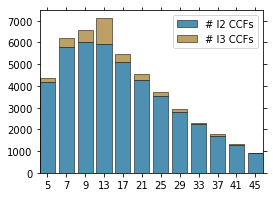

In [8]:
plt.figure(figsize=[4,3])
plt.bar(range(12), I2, label='# I2 CCFs', edgecolor='black', linewidth=0.5, color="#4E90B1")
plt.bar(range(12), I3, bottom=I2, label='# I3 CCFs', edgecolor='black', linewidth=0.5, color="#BDA065")
plt.xticks(range(12), perlist)
plt.xlim([-0.4,11.4])
plt.ylim([0,7500])
plt.tick_params(top='on', right='on')
plt.legend()
plt.savefig("/mnt/home/jieyaqi/Documents/plot/raynumber.pdf")